In [1]:
import random

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from algorithm_gd import forward, loss_fn, r2_score, gradient_m, gradient_c, get_iteration_vs_accuracy_data

In [4]:
no_of_nodes = 3

In [5]:
X = [1, 1, 1, 2, 2, 2, 3, 3, 3,  5, 5, 5, 6, 6, 6, 7,7, 7,  9, 9, 9, 10, 10, 10, 11, 11, 11]
y = [2, 2.25, 1.75, 2, 2.25, 1.75, 2, 2.25, 1.75, 6, 6.25, 5.75, 6, 6.25, 5.75, 6, 6.25, 5.75,  10, 9.75, 10.25, 10, 9.75, 10.25, 10, 9.75, 10.25]

Text(0, 0.5, 'Y')

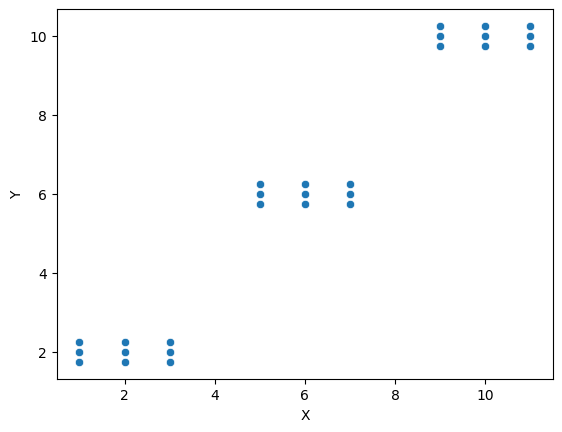

In [6]:
ax = sns.scatterplot(x=X, y=y)
ax.set_xlabel("X")
ax.set_ylabel("Y")

In [7]:
N = len(X) // no_of_nodes
N

9

In [8]:
def gen_test_data_partition(partitions, data):
    data_cp = data.copy()
    random.shuffle(data_cp)
    n = len(data_cp) // partitions
    result = []
    for i in range(partitions):
        result.append(data_cp[i*n:(i+1)*n])
    return result

In [9]:
node_data = []
node_test_samples = [{"X": [], "y": []} for i in range(no_of_nodes)]
for i in range(no_of_nodes):
    X_node = X[i*N:(i+1)*N]
    y_node = y[i*N:(i+1)*N]
    node_data.append({"X": X_node, "y": y_node})
    node_data[-1]["y_mean"] = sum(node_data[-1]["y"])/len(node_data[-1]["y"])
    test_samples = gen_test_data_partition(no_of_nodes, list(zip(X_node, y_node)))
    for j, node_test_sample in enumerate(test_samples):
        for test_sample in node_test_sample:
            node_test_samples[j]["X"].append(test_sample[0])
            node_test_samples[j]["y"].append(test_sample[1])

for i in range(no_of_nodes):
    node_test_samples[i]["y_mean"] = sum(node_test_samples[i]["y"])/len(node_test_samples[i]["y"])

# node_data, node_test_samples

In [10]:
node_params = [ {"m": 0, "c": 0} for i in range(no_of_nodes)]
node_params

[{'m': 0, 'c': 0}, {'m': 0, 'c': 0}, {'m': 0, 'c': 0}]

In [11]:
iterations = 1000

In [12]:
L = 0.001 # learning rate

In [13]:
# doubly_stochastic_matrix_config = [
#     [1/2, 1/4, 1/4],
#     [1/4, 0, 3/4],
#     [1/4, 3/4, 0]
# ]

doubly_stochastic_matrix_config = [
    [2/3, 1/6, 1/6],
    [1/6, 1/6, 2/3],
    [1/6, 2/3, 1/6]
]

In [14]:
steps_data = []
accuracy_data = [
    [] for i in range(no_of_nodes)
]

In [15]:
for i in range(1, iterations+1):
    steps_data.append(i)
    prev_node_params = node_params.copy()
    for node_id in range(no_of_nodes):
        params = node_params[node_id]
        
        X_node = node_data[node_id]["X"]
        y_node = node_data[node_id]["y"]
    
        X_node_test = node_test_samples[node_id]["X"]
        y_node_test = node_test_samples[node_id]["y"]
        y_node_test_mean = node_test_samples[node_id]["y_mean"]

        y_node_test_pred = forward(X_node_test, params)
        y_node_pred = forward(X_node, params)
        
        loss = loss_fn(y_node_test, y_node_test_pred)
        accuracy = r2_score(y_node_test, y_node_test_mean, y_node_test_pred)
        accuracy_data[node_id].append(accuracy)
        # print("Node:", node_id, "| Loss:", round(loss, 6), "| Accuracy:", round(accuracy, 6))
    
        grad_m = gradient_m(X_node, y_node, y_node_pred)
        grad_c = gradient_c(y_node, y_node_pred)

        doubly_st_mt = doubly_stochastic_matrix_config[node_id]
        params['m'] = sum( frac*prev_node_params[i]["m"] for i, frac in enumerate(doubly_st_mt) ) - L * grad_m
        params['c'] = sum( frac*prev_node_params[i]["c"] for i, frac in enumerate(doubly_st_mt) ) - L * grad_c

        print('%5f'%params['m'], end='   ')
    print()

    # print(node_params)

0.008000   0.073333   0.250222   
0.067169   0.256702   0.373073   
0.157060   0.370432   0.459292   
0.249424   0.453748   0.527004   
0.335260   0.520840   0.583499   
0.412235   0.577486   0.631970   
0.480313   0.626339   0.674064   
0.540185   0.668859   0.710805   
0.592720   0.706006   0.742944   
0.638774   0.738511   0.771080   
0.679129   0.766973   0.795720   
0.714486   0.791901   0.817303   
0.745460   0.813735   0.836208   
0.772594   0.832861   0.852767   
0.796363   0.849614   0.867272   
0.817184   0.864288   0.879978   
0.835422   0.877141   0.891106   
0.851398   0.888400   0.900853   
0.865392   0.898260   0.909389   
0.877649   0.906896   0.916865   
0.888384   0.914459   0.923413   
0.897786   0.921082   0.929146   
0.906021   0.926882   0.934166   
0.913232   0.931961   0.938562   
0.919547   0.936408   0.942411   
0.925077   0.940301   0.945780   
0.929919   0.943709   0.948729   
0.934158   0.946692   0.951310   
0.937869   0.949302   0.953569   
0.941117   0.9

In [16]:
Xy_test = gen_test_data_partition(no_of_nodes, list(zip(X, y)))[random.randint(0, no_of_nodes-1)]
X_test = []
y_test = []
for Xy in Xy_test:
    X_test.append(Xy[0])
    y_test.append(Xy[1])

gd_iterations, gd_accuracy = get_iteration_vs_accuracy_data(X, y, iterations, X_test=X_test, y_test=y_test, L=L)

<Axes: title={'center': 'Iteration vs Accuracy (1000 iterations)'}, xlabel='Iteration', ylabel='Accuracy'>

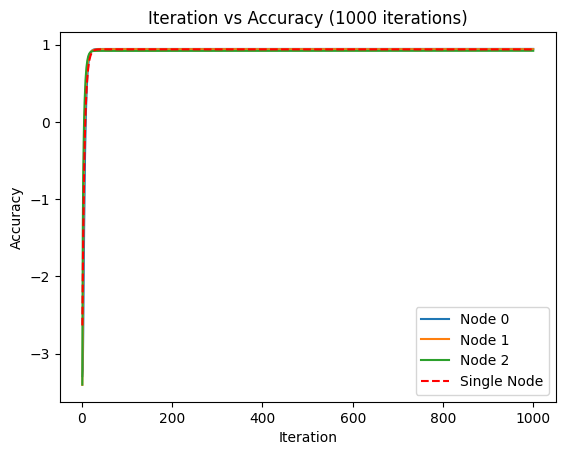

In [17]:
data = {f'Node {i}': accuracy_data[i] for i in range(no_of_nodes)}
df = pd.DataFrame({"Iteration": steps_data, **data})
dfl = pd.melt(df, ["Iteration"], value_name="Accuracy", var_name="Node")
ax = sns.lineplot(data=dfl, x='Iteration', y='Accuracy', hue='Node')
ax.set_title(f"Iteration vs Accuracy ({iterations} iterations)")
sns.lineplot(x=gd_iterations, y=gd_accuracy, linestyle='--', color='r', label='Single Node')

<Axes: title={'center': 'Iteration vs Accuracy (200 - 500 iterations)'}, xlabel='Iteration', ylabel='Accuracy'>

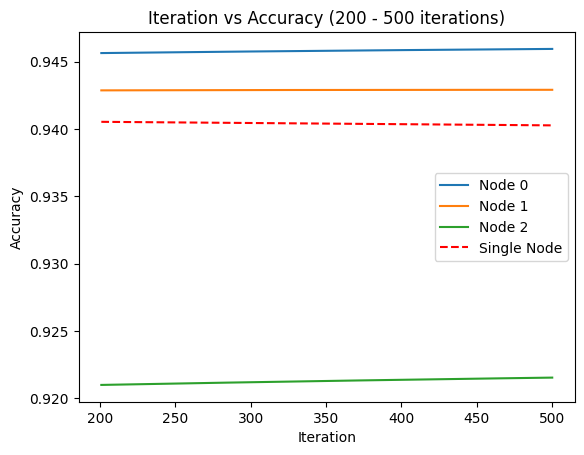

In [18]:
iteration_start = 200
iterations_sample = 500
data = {f'Node {i}': accuracy_data[i][iteration_start:iterations_sample] for i in range(no_of_nodes)}
df = pd.DataFrame({"Iteration": steps_data[iteration_start:iterations_sample], **data})
dfl = pd.melt(df, ["Iteration"], value_name="Accuracy", var_name="Node")

ax = sns.lineplot(data=dfl, x='Iteration', y='Accuracy', hue='Node')
ax.set_title(f"Iteration vs Accuracy ({iteration_start} - {iterations_sample} iterations)")

sns.lineplot(x=gd_iterations[iteration_start:iterations_sample], y=gd_accuracy[iteration_start:iterations_sample], linestyle='--', color='r', label='Single Node')

Text(0.5, 1.0, 'Iteration vs Accuracy (1000 iterations) - Gradient descent in single node')

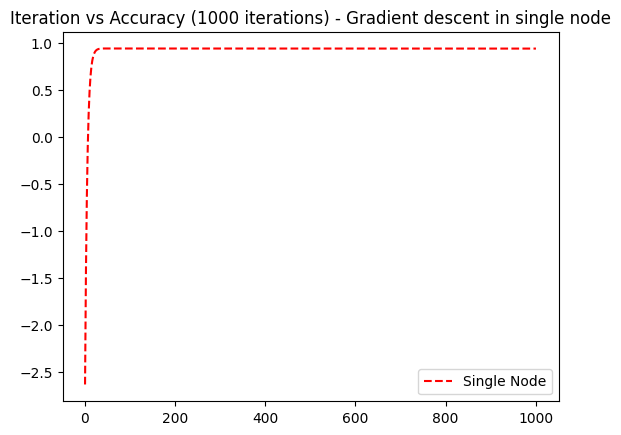

In [19]:
ax = sns.lineplot(x=gd_iterations, y=gd_accuracy, linestyle='--', color='r', label='Single Node')
ax.set_title(f"Iteration vs Accuracy ({iterations} iterations) - Gradient descent in single node")